<a href="https://colab.research.google.com/github/SIDBughani/bank-of-lincoln/blob/main/Test_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Daily Energy Consumption Dataset of Referigerator for 15 Smart Homes

## Step1: Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## Step2: Load Dataset

In [4]:
import pandas as pd

# Replace the file ID with your own
file_id = '1akHFbptin7W53HW-4h7pz3n5VT7cKC1P'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)

In [5]:
# Set the display format for float numbers to avoid scientific notation
pd.options.display.float_format = '{:.4f}'.format

print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

         Date  Home 0  Home 1  Home 3  Home 4       Home 5  Home 6_A  \
0  2016-08-10  0.0000  0.0000  0.0000  0.0000  518399.3592    0.0000   
1  2016-08-11  0.0000  0.0000  0.0000  0.0000 1046358.5434    0.0000   
2  2016-08-12  0.0000  0.0000  0.0000  0.0000 1129175.1151    0.0000   
3  2016-08-13  0.0000  0.0000  0.0000  0.0000 1174459.5255    0.0000   
4  2016-08-14  0.0000  0.0000  0.0000  0.0000 1173313.0312    0.0000   

   Home 6_B  Home 8  Home 9  Home 10  Home 12  Home 13  Home 14  
0    0.0000  0.0000  0.0000   0.0000   0.0000   0.0000   0.0000  
1    0.0000  0.0000  0.0000   0.0000   0.0000   0.0000   0.0000  
2    0.0000  0.0000  0.0000   0.0000   0.0000   0.0000   0.0000  
3    0.0000  0.0000  0.0000   0.0000   0.0000   0.0000   0.0000  
4    0.0000  0.0000  0.0000   0.0000   0.0000   0.0000   0.0000   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 14 columns):
 #   Column    

In [6]:
## Step3: Import Libraries

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from matplotlib import style

In [8]:
## Step4: Reformat the Date Columns

In [9]:
# Extract all Data Like Year MOnth Day etc
dataset = df

# Set the display format for float numbers to avoid scientific notation
pd.options.display.float_format = '{:.4f}'.format

dataset["Month"] = pd.to_datetime(df["Date"]).dt.month
dataset["Year"] = pd.to_datetime(df["Date"]).dt.year
dataset["Date"] = pd.to_datetime(df["Date"]).dt.date
dataset["Week"] = pd.to_datetime(df["Date"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["Date"]).dt.day_name()
dataset = df.set_index("Date")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

,Home 0,Home 1,Home 3,Home 4,Home 5,Home 6_A,Home 6_B,Home 8,Home 9,Home 10,Home 12,Home 13,Home 14,Month,Year,Week,Day
Date,,,,,,,,,,,,,,,,,
2016-08-10,0.0000,0.0000,0.0000,0.0000,518399.3592,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8,2016,32,Wednesday
2016-08-11,0.0000,0.0000,0.0000,0.0000,1046358.5434,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8,2016,32,Thursday
2016-08-12,0.0000,0.0000,0.0000,0.0000,1129175.1151,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8,2016,32,Friday
2016-08-13,0.0000,0.0000,0.0000,0.0000,1174459.5255,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8,2016,32,Saturday
2016-08-14,0.0000,0.0000,0.0000,0.0000,1173313.0312,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8,2016,32,Sunday


In [10]:
# How many Unique Year do we Have in Dataset
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2016 2017 2018 2019 2020] 

Total Number of Unique Year 5 



In [11]:
## Step5: Energy Distribution

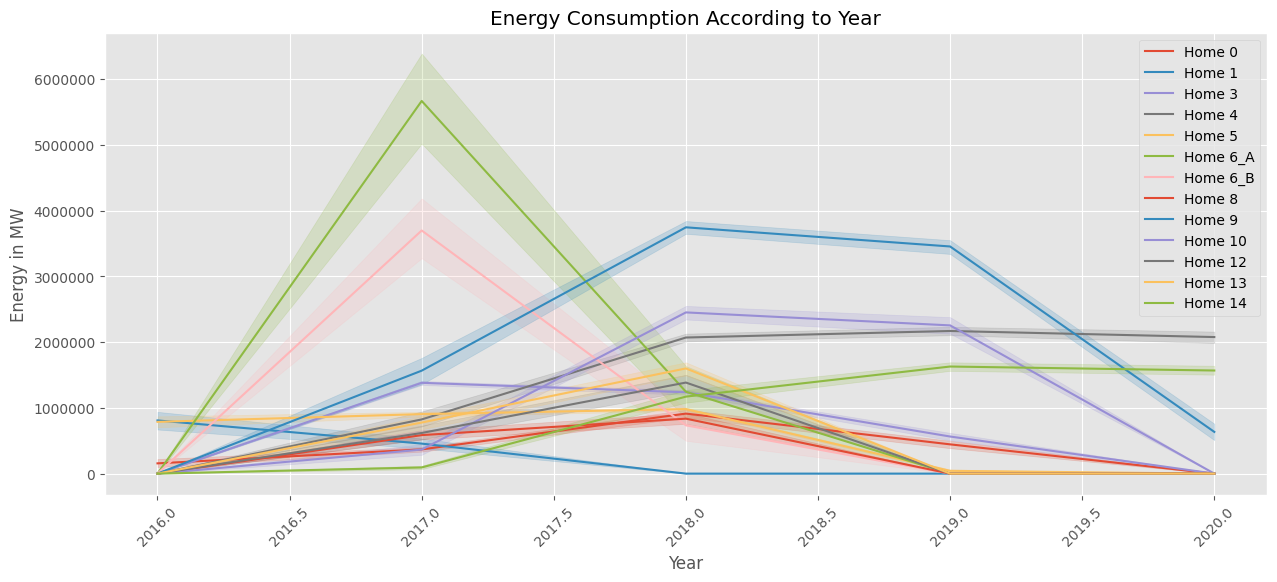

In [12]:
## Let us see the energy consumption each Year for every Home

# Set the style
style.use('ggplot')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot energy consumption for each home for each year
sns.lineplot(x='Year', y='Home 0', data=dataset, label='Home 0')
sns.lineplot(x='Year', y='Home 1', data=dataset, label='Home 1')
sns.lineplot(x='Year', y='Home 3', data=dataset, label='Home 3')
sns.lineplot(x='Year', y='Home 4', data=dataset, label='Home 4')
sns.lineplot(x='Year', y='Home 5', data=dataset, label='Home 5')
sns.lineplot(x='Year', y='Home 6_A', data=dataset, label='Home 6_A')
sns.lineplot(x='Year', y='Home 6_B', data=dataset, label='Home 6_B')
sns.lineplot(x='Year', y='Home 8', data=dataset, label='Home 8')
sns.lineplot(x='Year', y='Home 9', data=dataset, label='Home 9')
sns.lineplot(x='Year', y='Home 10', data=dataset, label='Home 10')
sns.lineplot(x='Year', y='Home 12', data=dataset, label='Home 12')
sns.lineplot(x='Year', y='Home 13', data=dataset, label='Home 13')
sns.lineplot(x='Year', y='Home 14', data=dataset, label='Home 14')

# Set labels and title
plt.title("Energy Consumption According to Year")
plt.xlabel("Year")
plt.ylabel("Energy in MW")

# Disable scientific notation in y-axis labels
ax.ticklabel_format(style='plain', axis='y')

# Set grid
plt.grid(True)

# Rotate x-axis labels for better readability
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

# Show the legend
plt.legend()

# Show the plot
plt.show()

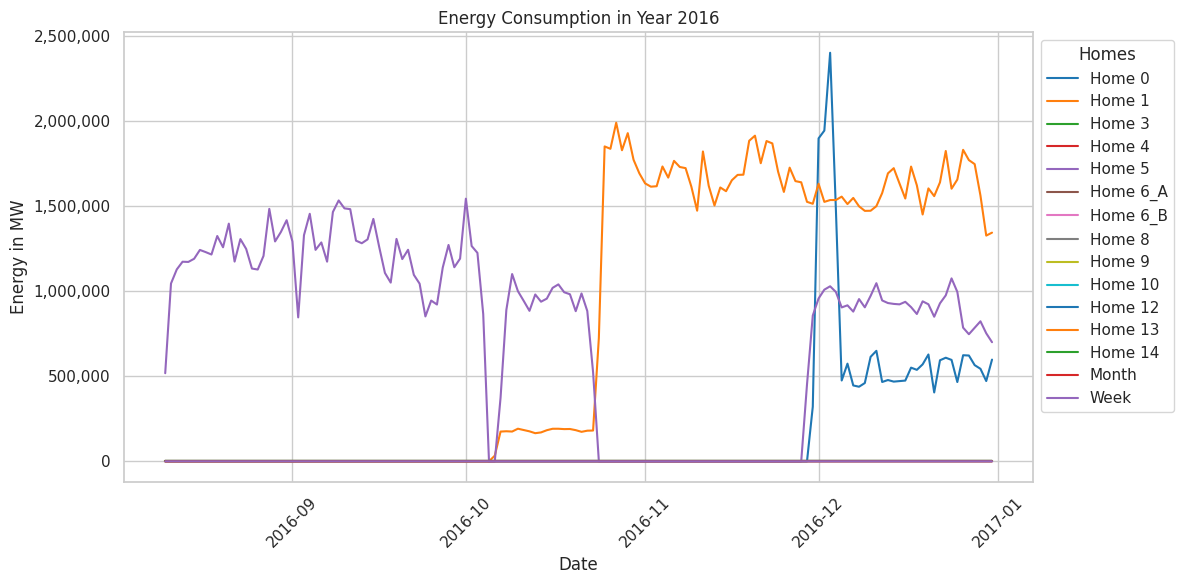

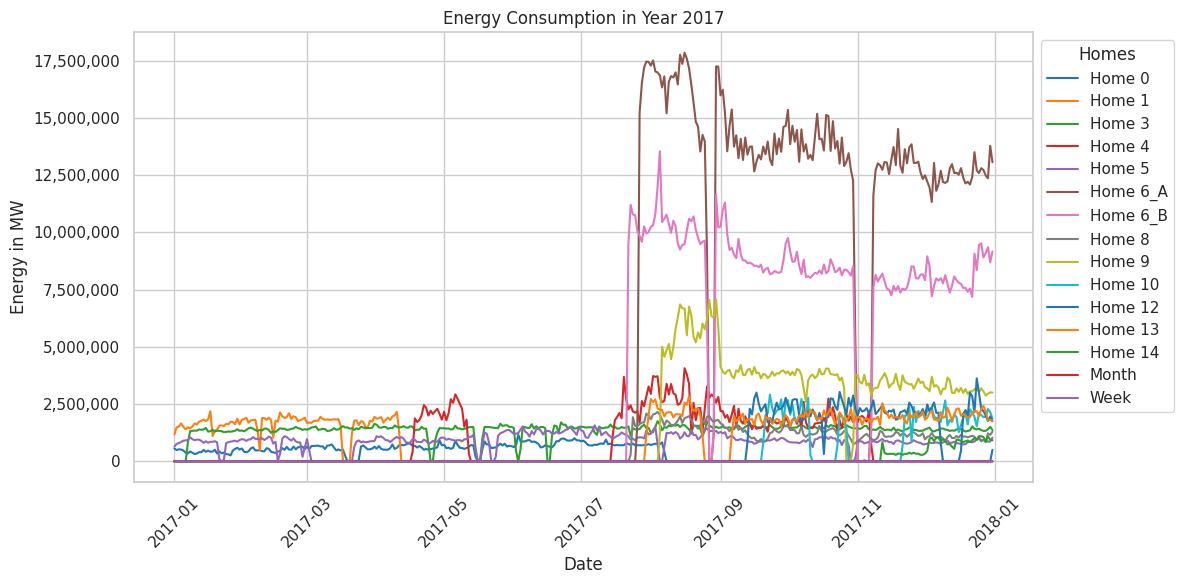

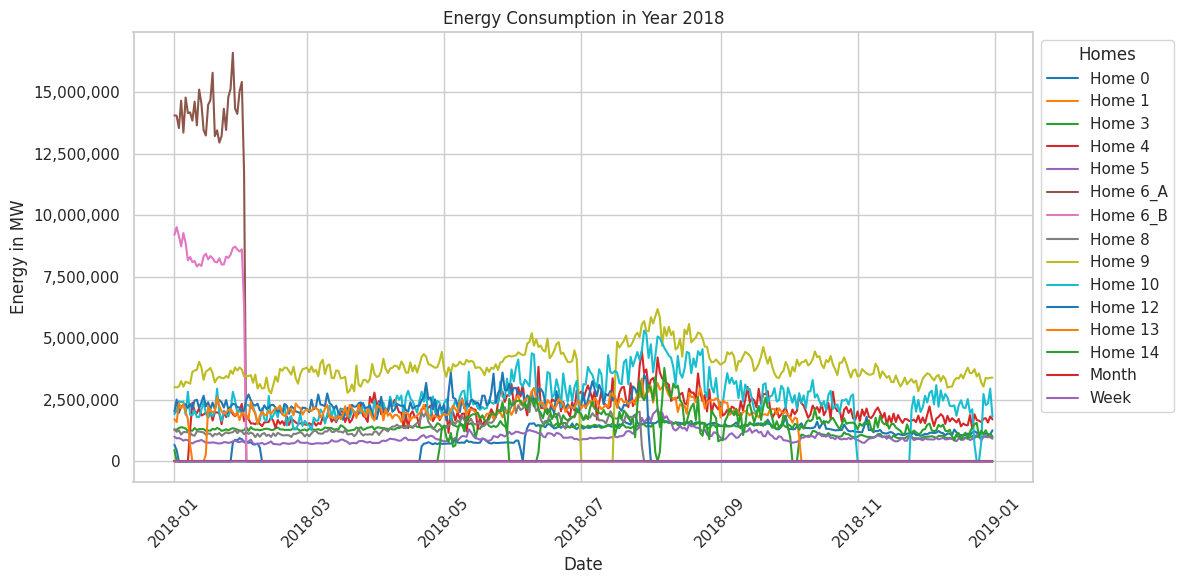

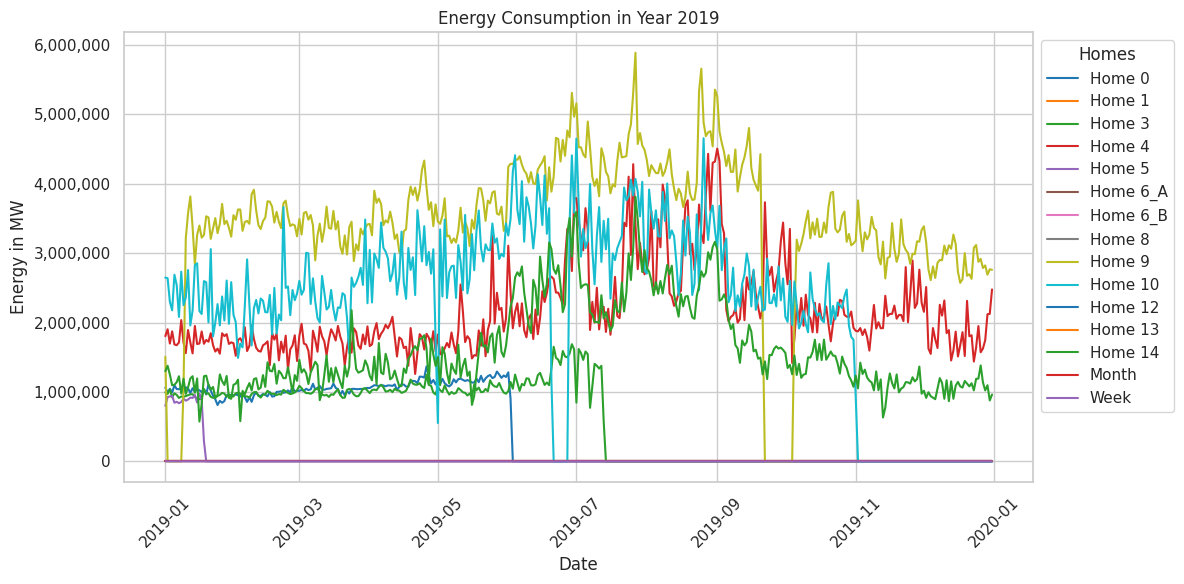

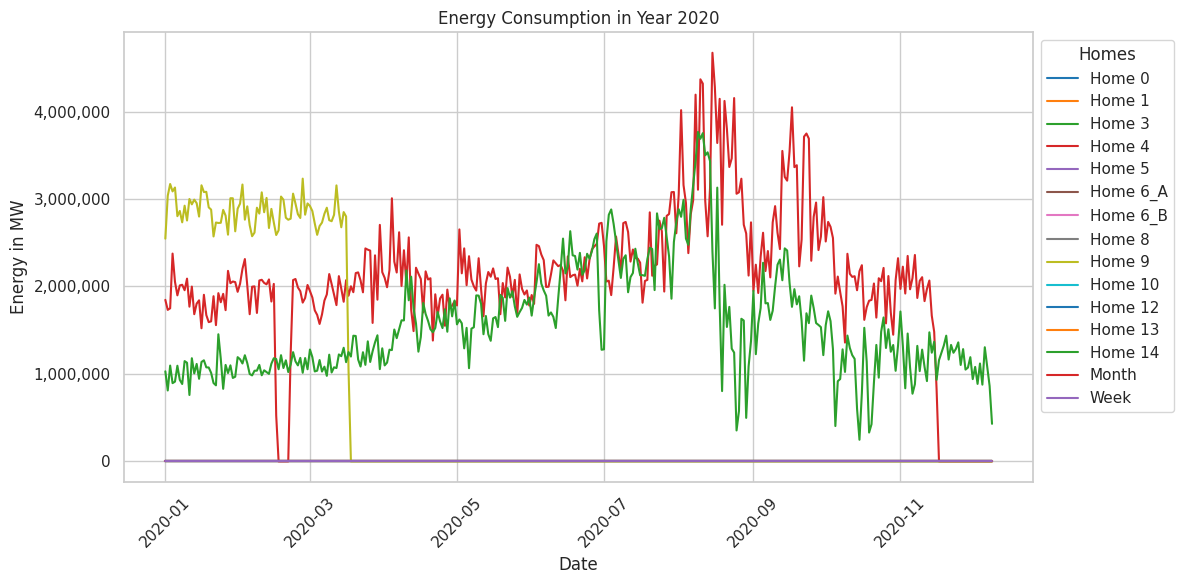

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the display format for float numbers to avoid scientific notation
pd.options.display.float_format = '{:.4f}'.format

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the "Date" column as the index
df.set_index('Date', inplace=True)

# Extract year from the Date index
df['Year'] = df.index.year

# Set the style
sns.set(style="whitegrid")

# Create separate plots for each year
for year in range(2016, 2021):
    plt.figure(figsize=(12, 6))

    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Plot energy consumption for all homes in the current year
    sns.lineplot(data=year_data.drop(['Year'], axis=1), dashes=False, palette="tab10")

    plt.title(f"Energy Consumption in Year {year}")
    plt.xlabel("Date")
    plt.ylabel("Energy in MW")
    plt.legend(title="Homes", loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)

    # Format y-axis labels to avoid scientific notation and add thousands separator
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    plt.tight_layout()
    plt.show()

In [14]:
## Total Energy Consumption for All Homes Each Year:

# Read your data into the DataFrame 'df'
dataset = df

# Extract year from the Date index (you can use this line if needed)
# df['Year'] = df.index.year

# Calculate total energy consumption for all homes per year
total_energy_per_year = df.groupby(['Year']).sum()

# Print the total energy consumption for all homes per year
print("Total Energy Consumption for All Homes Each Year:")
print("=" * 50)

for year in total_energy_per_year.index:
    print(f"\nYear: {year}")
    print("=" * 20)
    print(total_energy_per_year.loc[year])

    # Find the home with the highest energy consumption
    max_home = total_energy_per_year.loc[year].idxmax()
    max_value = total_energy_per_year.loc[year].max()
    print(f"Highest Energy Consumption: {max_home} - {max_value:.4f} MW")

    # Find the home with the lowest energy consumption
    min_home = total_energy_per_year.loc[year].idxmin()
    min_value = total_energy_per_year.loc[year].min()
    print(f"Lowest Energy Consumption: {min_home} - {min_value:.4f} MW")

    print("-" * 50)

Total Energy Consumption for All Homes Each Year:

Year: 2016
Home 0      22461932.7448
Home 1     116471418.7224
Home 3             0.0000
Home 4             0.0000
Home 5     113293442.0408
Home 6_A           0.0000
Home 6_B           0.0000
Home 8             0.0000
Home 9             0.0000
Home 10            0.0000
Home 12            0.0000
Home 13            0.0000
Home 14            0.0000
Month           1458.0000
Week            6058.0000
Name: 2016, dtype: Float64
Highest Energy Consumption: Home 1 - 116471418.7224 MW
Lowest Energy Consumption: Home 3 - 0.0000 MW
--------------------------------------------------

Year: 2017
Home 0      134381766.5720
Home 1      166595233.5453
Home 3      504016528.3733
Home 4      300783569.0659
Home 5      330201302.8067
Home 6_A   2068271918.2453
Home 6_B   1349343291.8930
Home 8      213688497.3649
Home 9      571439829.8452
Home 10     133567418.8824
Home 12     225573113.5674
Home 13     283460568.7685
Home 14      34246263.7331
Month 

<ipython-input-14-794b648058ac>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_energy_per_year = df.groupby(['Year']).sum()


<ipython-input-15-4061741da7f6>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_energy_per_year = df.groupby(['Year'], as_index=False).sum()


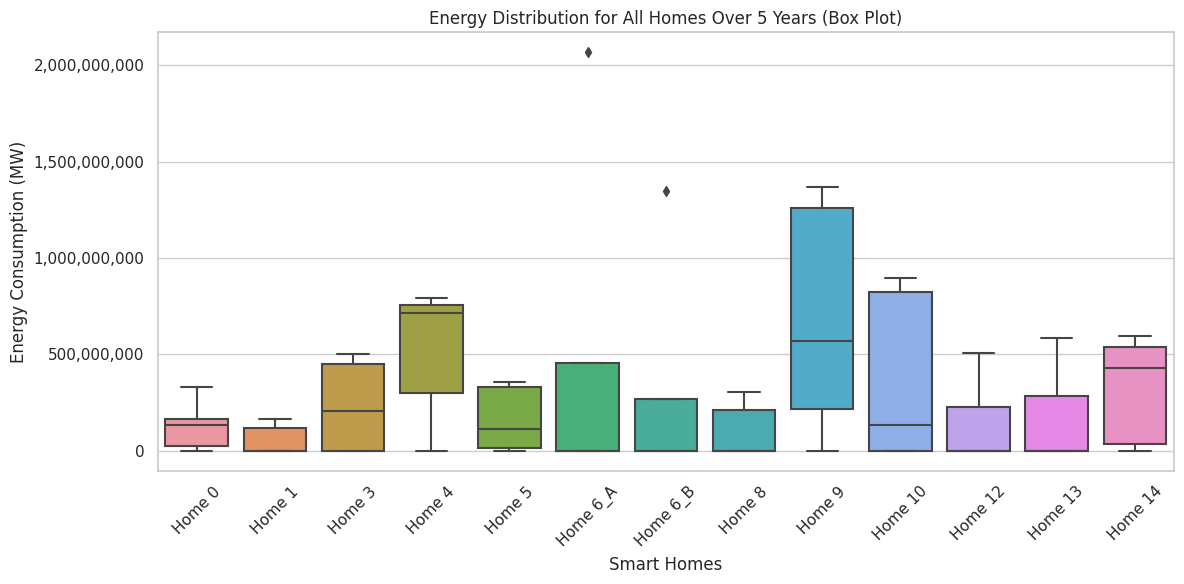

In [15]:
## Energy Consumption of all Smart Homes

# Read the data
df = pd.read_csv(link)

# Set the display format for float numbers to avoid scientific notation
pd.options.display.float_format = '{:.4f}'.format

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate total energy consumption for all homes per year
total_energy_per_year = df.groupby(['Year'], as_index=False).sum()

# Melt the dataframe to create a single column for all homes
melted_df = pd.melt(total_energy_per_year, id_vars=['Year'], value_vars=df.columns[1:-1])

# Set style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Create a box plot
ax = sns.boxplot(data=melted_df, x='variable', y='value')

# Set labels and title
plt.title("Energy Distribution for All Homes Over 5 Years (Box Plot)")
plt.xlabel("Smart Homes")
plt.ylabel("Energy Consumption (MW)")

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Format y-axis labels to avoid scientific notation
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-16-299ac05ed3b0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Home': home, 'Year': year, 'Month': monthly_energy['Month'], 'Total Energy': monthly_energy[home]}, ignore_index=True)
<ipython-input-16-299ac05ed3b0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Home': home, 'Year': year, 'Month': monthly_energy['Month'], 'Total Energy': monthly_energy[home]}, ignore_index=True)
<ipython-input-16-299ac05ed3b0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Home': home, 'Year': year, 'Month': monthly_energy['Month'], 'Total Energy': monthly_energy[home]}, ignore_index=True)
<ipython-input-16-299ac05ed3b0>:34: FutureWarning

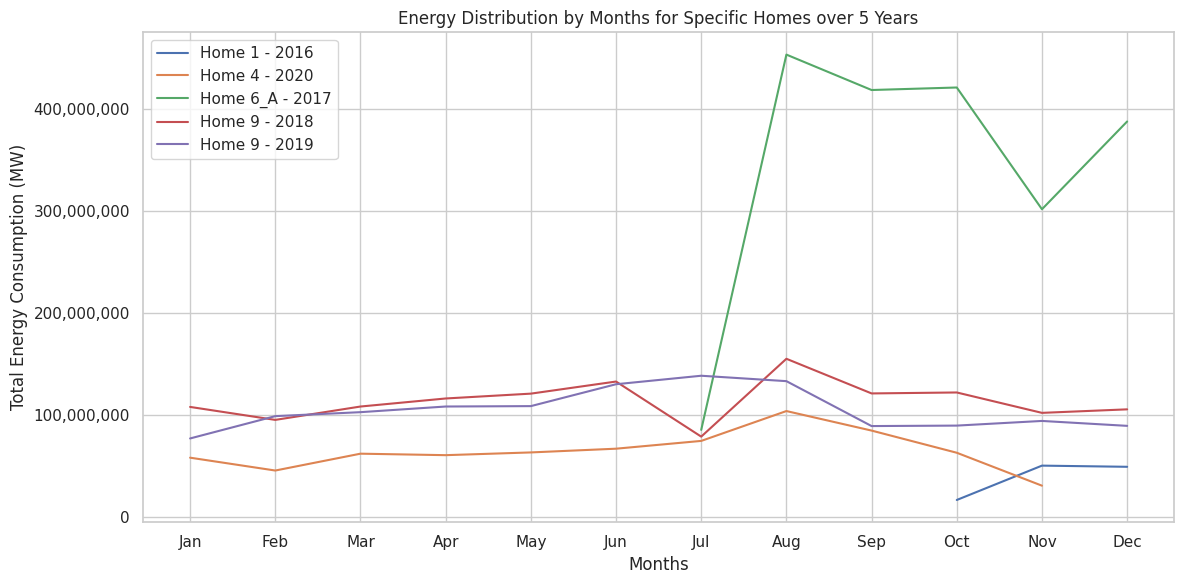

In [16]:
## Energy with Respect to Month for selected homes

# Set the display format for float numbers to avoid scientific notation
pd.options.display.float_format = '{:.4f}'.format

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Define the homes and years of interest
homes_and_years = [
    ('Home 1', 2016),
    ('Home 4', 2020),
    ('Home 6_A', 2017),
    ('Home 9', 2018),
    ('Home 9', 2019)
]

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Home', 'Year', 'Month', 'Total Energy'])

# Iterate through the homes and years of interest
for home, year in homes_and_years:
    # Filter the data
    filtered_data = df[(df['Year'] == year) & (df[home] > 0)]

    # Group by month and calculate total energy consumption
    monthly_energy = filtered_data.groupby('Month')[home].sum().reset_index()

    # Add the results to the DataFrame
    results = results.append({'Home': home, 'Year': year, 'Month': monthly_energy['Month'], 'Total Energy': monthly_energy[home]}, ignore_index=True)

# Set style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Create a line plot for each home and year
for idx, row in results.iterrows():
    plt.plot(row['Month'], row['Total Energy'], label=f"{row['Home']} - {row['Year']}")

# Set labels and title
plt.title("Energy Distribution by Months for Specific Homes over 5 Years")
plt.xlabel("Months")
plt.ylabel("Total Energy Consumption (MW)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Format y-axis labels to avoid scientific notation
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
## Step6: Resampling and Training Data

In [18]:
# Assuming 'Date' is the column name for dates
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [19]:
# Select the home column you want to predict energy consumption for
selected_home = 'Home 14'  # Replaced with the desired home column

In [20]:
# Prepare data for LSTM
data = df[[selected_home]].values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [21]:
X = []
y = []
look_back = 365  # Use the last 365 days for prediction
for i in range(len(data_scaled) - look_back):
    X.append(data_scaled[i:i+look_back])
    y.append(data_scaled[i+look_back])

X = np.array(X)
y = np.array(y)

In [22]:
# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [24]:
## Step7: Build a Model

In [23]:
# Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(look_back, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
31/31 [==============================] - 9s 203ms/step - loss: 0.0319
Epoch 2/50
31/31 [==============================] - 5s 145ms/step - loss: 0.0069
Epoch 3/50
31/31 [==============================] - 5s 178ms/step - loss: 0.0064
Epoch 4/50
31/31 [==============================] - 6s 205ms/step - loss: 0.0061
Epoch 5/50
31/31 [==============================] - 5s 148ms/step - loss: 0.0060
Epoch 6/50
31/31 [==============================] - 8s 269ms/step - loss: 0.0057
Epoch 7/50
31/31 [==============================] - 5s 146ms/step - loss: 0.0056
Epoch 8/50
31/31 [==============================] - 5s 174ms/step - loss: 0.0055
Epoch 9/50
31/31 [==============================] - 6s 178ms/step - loss: 0.0053
Epoch 10/50
31/31 [==============================] - 8s 262ms/step - loss: 0.0053
Epoch 11/50
31/31 [==============================] - 6s 190ms/step - loss: 0.0055
Epoch 12/50
31/31 [==============================] - 5s 149ms/step - loss: 0.0050
Epoch 13/50
31/31 [======

In [25]:
## Step8: Testing

In [26]:
# Test the model
predicted_scaled = model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)
true_values = scaler.inverse_transform(y_test)

8/8 [==============================] - 1s 52ms/step


In [27]:
# Initialize counters
true_count = 0
predicted_count = 0

# Print the results
for i in range(len(true_values)):
    true_value = round(true_values[i][0], 4)
    predicted_value = round(predicted[i][0], 4)

    print(f"True energy consumption: {true_value}, Predicted energy consumption: {predicted_value}")

    true_count += 1
    predicted_count += 1

# Print the total counts
print(f"Total true values: {true_count}")
print(f"Total predicted values: {predicted_count}")

True energy consumption: 2183845.7538, Predicted energy consumption: 1516904.875
True energy consumption: 1842112.8519, Predicted energy consumption: 1825736.25
True energy consumption: 2111711.6333, Predicted energy consumption: 1766572.875
True energy consumption: 1749702.0855, Predicted energy consumption: 1905395.25
True energy consumption: 1577739.0816, Predicted energy consumption: 1773688.625
True energy consumption: 1254749.9322, Predicted energy consumption: 1658943.625
True energy consumption: 1422076.5984, Predicted energy consumption: 1462453.25
True energy consumption: 1810945.9465, Predicted energy consumption: 1472785.0
True energy consumption: 1685806.5441, Predicted energy consumption: 1652569.125
True energy consumption: 1607081.8997, Predicted energy consumption: 1640728.375
True energy consumption: 1510545.9957, Predicted energy consumption: 1598196.75
True energy consumption: 1476455.3206, Predicted energy consumption: 1534190.625
True energy consumption: 1526023.3

In [28]:
# Predict energy consumption for a future year using available data
future_year_data = df[selected_home].values  # Use all available data for the future year
if len(future_year_data) >= look_back:
    future_year_scaled = scaler.transform(future_year_data.reshape(-1, 1))
    future_X = []
    for i in range(len(future_year_scaled) - look_back):
        future_X.append(future_year_scaled[i:i+look_back])

    future_X = np.array(future_X)
    future_predicted_scaled = model.predict(future_X)
    future_predicted = scaler.inverse_transform(future_predicted_scaled)

    # Print the predicted energy consumption for the future year
    for i in range(len(future_predicted)):
        predicted_value = round(future_predicted[i][0], 4)
        print(f"Predicted energy consumption: {predicted_value}")
else:
    print("Insufficient data for prediction in the future year.")

39/39 [==============================] - 2s 49ms/step
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumption: 5382.3017578125
Predicted energy consumpti

In [29]:
# Initialize a counter for predictions
prediction_count = 0

# Print the predicted energy consumption for the future year
for i in range(len(future_predicted)):
    predicted_value = round(future_predicted[i][0], 4)
    print(f"Predicted energy consumption for 2023: {predicted_value}")
    prediction_count += 1

# Print the total number of predictions made
print(f"Total predictions for 2023: {prediction_count}")

Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted energy consumption for 2023: 5382.3017578125
Predicted 

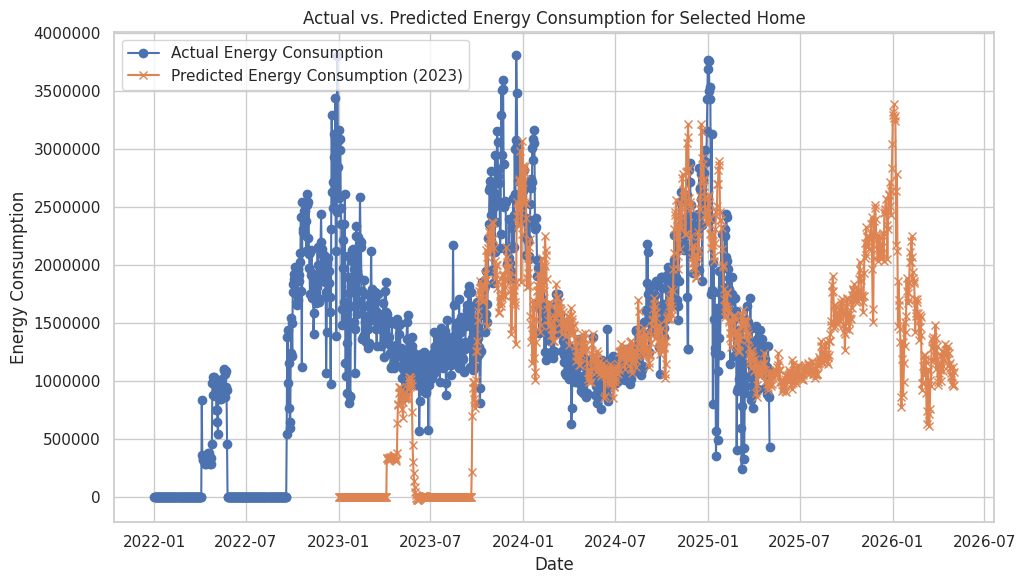

In [31]:
import matplotlib.pyplot as plt

# Extract actual values for the selected home
selected_home_actual = future_year_data[-len(future_predicted):]

# Create a list of days for the x-axis (assuming you have the corresponding dates)
days_actual = pd.date_range(start='2022-01-01', periods=len(selected_home_actual))
days_predicted = pd.date_range(start='2023-01-01', periods=len(future_predicted))

# Plot the actual and predicted energy consumption values
plt.figure(figsize=(10, 6))
plt.plot(days_actual, selected_home_actual, marker='o', label='Actual Energy Consumption')
plt.plot(days_predicted, future_predicted, marker='x', label='Predicted Energy Consumption (2023)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption for Selected Home')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Format y-axis to avoid scientific notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Show the plot
plt.show()